<h1 align="center"><font size="5">Using Data Science to Understand the North American Data Science Labour Market:<br>A Canada-U.S. Comparison<br></font></h1> 
<h2 align="center"><font size="3">Capstone Project as required for completion of the IBM Data Science Professional Certificate</font></h2>
<p style="text-align:center;"><font size="2"><i>by Pierre-Olivier Bonin 
    <a href="https://www.linkedin.com/in/pierreolivierbonin">(LinkedIn)</a>
    <a href="https://github.com/pierreolivierbonin">(GitHub)</a> </i></font></p>

## Table of contents
* [Introduction: Data Science in the U.S. & Canada](#introduction)
* [The Data](#data)
* [Preprocessing & Data Visualization](#preprocessing)
* [Machine Learning Modelling](#modelling)
* [Model Evaluation](#evaluation)
* [Discussion and Conclusions](#discussion)

## Introduction: Data Science in the U.S. & Canada<a name="introduction"></a>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Kaggle has been surveying professionals working in the field of data science for a few years to improve our understanding of the dynamics of the job market. The datasets available are covering dozens of countries and territories across the world. While the Kaggle community has offered many insights around the case of the United States, there remains a lot to be discovered about data science in Canada. By shedding light specifically on the Canadian data science job market and comparing it with its counterpart in the United States, this data science project will help employers, employees, and candidates better understand the skills needed to become a data scientist, the job titles they are likely to have, as well as whether these skills and titles vary across the two countries.

This is especially relevant in a time where work-from-home arrangements are becoming more prevalent. The current pandemic has brought about major restructurations in the industry. Companies are now looking to hire data scientists across the globe. Understanding the distinct features of a specific labour market should thus be of value for many stakeholders.

## The Data<a name="data"></a>

As mentioned above, the dataset that we will use come from Kaggle. The company conducts an annual survey and this one has been conducted from October 8th to October 28th of the year 2019. Respondents were “found primarily through Kaggle channels, like [their] email list, discussion forums and social media channels” (see: https://www.kaggle.com/c/kaggle-survey-2019/data?select=multiple_choice_responses.csv). In total, there were 19 717 respondents from 171 countries and territories across the globe.

In [151]:
# Run these if not already installed (remove the hashtags) for the following lines:

#!pip install "notebook>=5.3" "ipywidgets>=7.2"
#!pip install seaborn==0.11.0
# conda install -c anaconda nbformat

# Then, restart the Jupyter IDE

In [152]:
#importing relevant libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

In [153]:
#loading the datasets
df=pd.read_csv("./multiple_choice_responses.csv", low_memory = False)
dfQuestions=pd.read_csv("./questions_only.csv")

## Preprocessing & Data Visualization <a name="preprocessing"></a>

This section systematically transforms and examines the data. Specifically, the notebook takes the reader through the whole process of this data science project. This includes all of the following steps:

**Preprocessing (ETL) the data:**

>- examining the full dataset
>- looking at the question labels of each questions to ensure a thorough understanding of the dataset
>- selecting features of interest
>- dropping the first row of the dataset, which contains question labels
>- examining the data types to ensure they are properly formatted
>- excluding students and unemployed individuals from the dataframe since we are seeking to examine the structure of the labour market as it stands and not as it may become once these respondents have landed a position in the field
>- creating a new dataframe with a reduced number of features as explained in our report
>- reducing the sample to a subsample including only Canadian and American respondents to fit with the objectives of our analysis
>- renaming the columns so we can intuitively understand the dataframe when looking at it in Python
>- replacing missing values with 0s and non-missing values with 1s in the questions pertaining to the languages used. We are aware that this question will be problematic because of the original format of the variable, which included multiple choice into a single variable which was then split into several dummy variables. We will therefore need to be careful in interpreting results around these features.

**Data Visualization:**
> For the data visualization and exploratory analysis, we do two kinds of operation: 
<br>(1) comparing distributions between Canada and the U.S., and</br>
<br>(2) plotting interesting findings into appealing and (ideally) intuitive visualizations.</br>

>For the coding of visualization, we use mostly Seaborn and the Tidyverse pipes, the latter of which you can find a neat explanation by Steven Morse [here](https://stmorse.github.io/journal/tidyverse-style-pandas.html)

## Machine Learning Modelling <a name="modelling"></a>

> Given the nature of our problem, we choose to model a decision tree classifier and explore what we can do with K-means clustering.

#### Preprocessing Code

In [154]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe - Text,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Other - Text,What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,...,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Microsoft SQL Server,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Oracle Database,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Microsoft Access,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - AWS Relational Database Service,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - AWS DynamoDB,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Azure SQL Database,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Google Cloud SQL,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - None,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Other,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Other - Text
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


In [155]:
dfQuestions.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice,...,Which categories of ML tools do you use on a regular basis? (Select all that apply) - Selected Choice,Which categories of computer vision methods do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice,Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice,Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice,Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice


In [156]:
dfQuestions_transposed=dfQuestions.transpose()

In [157]:
pd.set_option('display.max_colwidth', None)
dfQuestions_transposed

,0
Time from Start to Finish (seconds),Duration (in seconds)
Q1,What is your age (# years)?
Q2,What is your gender? - Selected Choice
Q3,In which country do you currently reside?
Q4,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
Q5,Select the title most similar to your current role (or most recent title if retired): - Selected Choice
Q6,What is the size of the company where you are employed?
Q7,Approximately how many individuals are responsible for data science workloads at your place of business?
Q8,Does your current employer incorporate machine learning methods into their business?
Q9,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice


In [158]:
df.drop([0,], inplace=True)
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1
5,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [159]:
df['Q5'].value_counts(ascending=False)

Data Scientist             4085
Student                    4014
Software Engineer          2705
Other                      1690
Data Analyst               1598
Research Scientist         1470
Not employed                942
Business Analyst            778
Product/Project Manager     723
Data Engineer               624
Statistician                322
DBA/Database Engineer       156
Name: Q5, dtype: int64

In [160]:
df['Q3'].value_counts(ascending=False)

India                                                   4786
United States of America                                3085
Other                                                   1054
Brazil                                                   728
Japan                                                    673
Russia                                                   626
China                                                    574
Germany                                                  531
United Kingdom of Great Britain and Northern Ireland     482
Canada                                                   450
Spain                                                    399
Nigeria                                                  395
France                                                   387
Taiwan                                                   301
Turkey                                                   288
Italy                                                    271
Australia               

In [161]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1
5,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19717 entries, 1 to 19717
Columns: 246 entries, Time from Start to Finish (seconds) to Q34_OTHER_TEXT
dtypes: object(246)
memory usage: 37.2+ MB


In [163]:
df.dtypes

Time from Start to Finish (seconds)    object
Q1                                     object
Q2                                     object
Q2_OTHER_TEXT                          object
Q3                                     object
                                        ...  
Q34_Part_9                             object
Q34_Part_10                            object
Q34_Part_11                            object
Q34_Part_12                            object
Q34_OTHER_TEXT                         object
Length: 246, dtype: object

In [164]:
df.loc[:, "Q18_Part_1":"Q18_Part_12"]

,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12
1,Python,R,SQL,NaN,NaN,Java,Javascript,NaN,NaN,MATLAB,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN
5,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
df[["Q18_Part_1", "Q18_Part_2", "Q18_Part_3"]].describe()

,Q18_Part_1,Q18_Part_2,Q18_Part_3
count,12841,4588,6532
unique,1,1,1
top,Python,R,SQL
freq,12841,4588,6532


In [166]:
# First five programming languages (not "top 5", however)
df[["Q18_Part_1", "Q18_Part_3", "Q18_Part_4", "Q18_Part_5", "Q18_Part_6"]].describe()

,Q18_Part_1,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6
count,12841,6532,1672,2256,2267
unique,1,1,1,1,1
top,Python,SQL,C,C++,Java
freq,12841,6532,1672,2256,2267


In [167]:
df.loc[:, "Q18_Part_1":"Q18_Part_12"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19717 entries, 1 to 19717
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q18_Part_1   12841 non-null  object
 1   Q18_Part_2   4588 non-null   object
 2   Q18_Part_3   6532 non-null   object
 3   Q18_Part_4   1672 non-null   object
 4   Q18_Part_5   2256 non-null   object
 5   Q18_Part_6   2267 non-null   object
 6   Q18_Part_7   2174 non-null   object
 7   Q18_Part_8   389 non-null    object
 8   Q18_Part_9   2037 non-null   object
 9   Q18_Part_10  1516 non-null   object
 10  Q18_Part_11  83 non-null     object
 11  Q18_Part_12  1148 non-null   object
dtypes: object(12)
memory usage: 2.0+ MB


### Dealing with missing values

In [168]:
# exploring missing values
df[["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q10", "Q14", "Q15", "Q23"]].isna().sum()

Q1        0
Q2        0
Q3        0
Q4      394
Q5      610
Q6     5715
Q7     6094
Q8     6490
Q10    7220
Q14    4027
Q15    4090
Q23    5535
dtype: int64

Here, we exclude students and unemployed respondents

In [169]:
df = df[~df['Q5'].isin(["Student", "Not employed"])]

In [170]:
df[["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q10", "Q14", "Q15", "Q23"]].isna().sum()

Q1        0
Q2        0
Q3        0
Q4      394
Q5      610
Q6      759
Q7     1138
Q8     1534
Q10    2264
Q14    3309
Q15    3339
Q23    4220
dtype: int64

Here, we select a reduced number of features for the analysis

In [171]:
newdf=df[["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q10", "Q14", "Q15", "Q18_Part_1", "Q18_Part_2", "Q18_Part_3", "Q18_Part_4", "Q18_Part_5", "Q18_Part_6", "Q18_Part_7", "Q18_Part_8", "Q18_Part_9", "Q18_Part_10", "Q18_Part_11", "Q18_Part_12", "Q23"]]
newdf.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,Q14,...,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q23
1,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,"30,000-39,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,Java,Javascript,NaN,NaN,MATLAB,NaN,NaN,1-2 years
2,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., models in production for more than 2 years)","5,000-7,499","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55-59,Female,Germany,Professional degree,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,"250,000-299,999","Local development environments (RStudio, JupyterLab, etc.)",...,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,2-3 years
5,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),"4,000-4,999","Local development environments (RStudio, JupyterLab, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,< 1 years


In [172]:
newdf.shape

(14761, 24)

In [173]:
newdf.isna().sum()

Q1                 0
Q2                 0
Q3                 0
Q4               394
Q5               610
Q6               759
Q7              1138
Q8              1534
Q10             2264
Q14             3309
Q15             3339
Q18_Part_1      5398
Q18_Part_2     11109
Q18_Part_3      9333
Q18_Part_4     13812
Q18_Part_5     13405
Q18_Part_6     13163
Q18_Part_7     13041
Q18_Part_8     14408
Q18_Part_9     12998
Q18_Part_10    13799
Q18_Part_11    14692
Q18_Part_12    13745
Q23             4220
dtype: int64

In [174]:
newdf.shape

(14761, 24)

In [175]:
# We select only the two countries of interest
newdf=newdf[(newdf["Q3"]=="Canada")|(newdf["Q3"]=="United States of America")]
newdf["Q3"].value_counts()

United States of America    2489
Canada                       355
Name: Q3, dtype: int64

In [176]:
# We verify if the operation was correctly conducted. It was.
newdf.shape

(2844, 24)

In [177]:
newdf.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,Q14,...,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q23
8,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","80,000-89,999","Local development environments (RStudio, JupyterLab, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years
14,30-34,Male,United States of America,Master’s degree,Product/Project Manager,"> 10,000 employees",20+,I do not know,"90,000-99,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-3 years
16,50-54,Female,United States of America,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but do not put working models into production),"125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-2 years
22,35-39,Male,United States of America,Bachelor’s degree,Other,250-999 employees,10-14,"We have well established ML methods (i.e., models in production for more than 2 years)","125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-3 years
34,30-34,Female,United States of America,Master’s degree,Research Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","150,000-199,999","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years


In [178]:
newdf["Q3"].value_counts()

United States of America    2489
Canada                       355
Name: Q3, dtype: int64

In [179]:
newdf[["Q18_Part_1", "Q18_Part_2", "Q18_Part_3", "Q18_Part_4", 
       "Q18_Part_5", "Q18_Part_6", "Q18_Part_7", "Q18_Part_8", "Q18_Part_9", 
       "Q18_Part_10", "Q18_Part_11", "Q18_Part_12"]].describe()

,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12
count,1831,898,1294,133,220,237,331,65,491,171,16,288
unique,1,1,1,1,1,1,1,1,1,1,1,1
top,Python,R,SQL,C,C++,Java,Javascript,TypeScript,Bash,MATLAB,None,Other
freq,1831,898,1294,133,220,237,331,65,491,171,16,288


In [180]:
newdf.rename(columns={"Q1":"age", "Q2":"gender", "Q3":"country", "Q4":"education", "Q5":"job", "Q6":"cpny_size", 
                      "Q7":"team_size", "Q8":"ML_methods", "Q10":"salary","Q14":"primary_tool", "Q15":"coding_exp", 
                      "Q18_Part_1":"Python", "Q18_Part_2":"R", "Q18_Part_3":"SQL", "Q18_Part_4":"C", 
                      "Q18_Part_5":"C++", "Q18_Part_6":"Java", "Q18_Part_7":"JavaScript", "Q18_Part_8":"TypeScript", 
                     "Q18_Part_9":"Bash", "Q18_Part_10":"MATLAB", "Q18_Part_11":"None", "Q18_Part_12":"Other",
                     "Q23":"ML_yrs"}, inplace=True)
newdf.head()

,age,gender,country,education,job,cpny_size,team_size,ML_methods,salary,primary_tool,...,C,C++,Java,JavaScript,TypeScript,Bash,MATLAB,None,Other,ML_yrs
8,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","80,000-89,999","Local development environments (RStudio, JupyterLab, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years
14,30-34,Male,United States of America,Master’s degree,Product/Project Manager,"> 10,000 employees",20+,I do not know,"90,000-99,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-3 years
16,50-54,Female,United States of America,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but do not put working models into production),"125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-2 years
22,35-39,Male,United States of America,Bachelor’s degree,Other,250-999 employees,10-14,"We have well established ML methods (i.e., models in production for more than 2 years)","125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-3 years
34,30-34,Female,United States of America,Master’s degree,Research Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","150,000-199,999","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years


In [181]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2844 entries, 8 to 19434
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           2844 non-null   object
 1   gender        2844 non-null   object
 2   country       2844 non-null   object
 3   education     2794 non-null   object
 4   job           2763 non-null   object
 5   cpny_size     2728 non-null   object
 6   team_size     2658 non-null   object
 7   ML_methods    2603 non-null   object
 8   salary        2435 non-null   object
 9   primary_tool  2271 non-null   object
 10  coding_exp    2265 non-null   object
 11  Python        1831 non-null   object
 12  R             898 non-null    object
 13  SQL           1294 non-null   object
 14  C             133 non-null    object
 15  C++           220 non-null    object
 16  Java          237 non-null    object
 17  JavaScript    331 non-null    object
 18  TypeScript    65 non-null     object
 19  Bash 

Here, we transform missing values into 0s and values not missing into 1s

In [182]:
newdf.loc[:, "Python":"Other"]=newdf.loc[:,"Python":"Other"].notnull().astype('int') # do the same to the original df

In [183]:
newdf.loc[:, "Python":"Other"]

,Python,R,SQL,C,C++,Java,JavaScript,TypeScript,Bash,MATLAB,None,Other
8,1,0,0,0,0,0,0,0,0,0,0,0
14,1,0,0,0,0,0,0,0,0,0,0,0
16,1,1,1,0,0,0,0,0,0,0,0,0
22,1,0,0,0,0,0,0,0,0,0,0,0
34,1,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19408,0,0,0,0,0,0,0,0,0,0,0,0
19415,0,0,0,0,0,0,0,0,0,0,0,0
19419,0,0,0,0,0,0,0,0,0,0,0,0
19432,0,0,0,0,0,0,0,0,0,0,0,0


In [184]:
newdf.head()

,age,gender,country,education,job,cpny_size,team_size,ML_methods,salary,primary_tool,...,C,C++,Java,JavaScript,TypeScript,Bash,MATLAB,None,Other,ML_yrs
8,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","80,000-89,999","Local development environments (RStudio, JupyterLab, etc.)",...,0,0,0,0,0,0,0,0,0,3-4 years
14,30-34,Male,United States of America,Master’s degree,Product/Project Manager,"> 10,000 employees",20+,I do not know,"90,000-99,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,0,0,0,0,0,0,0,0,0,2-3 years
16,50-54,Female,United States of America,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but do not put working models into production),"125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,0,0,0,0,0,0,0,0,0,1-2 years
22,35-39,Male,United States of America,Bachelor’s degree,Other,250-999 employees,10-14,"We have well established ML methods (i.e., models in production for more than 2 years)","125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,0,0,0,0,0,0,0,0,0,2-3 years
34,30-34,Female,United States of America,Master’s degree,Research Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","150,000-199,999","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",...,0,0,0,0,0,0,0,0,0,3-4 years


### Data Visualization and Exploratory Analysis

**Methodological caveats:**
>- For the data visualization and exploratory analysis, we do two kinds of operation: 
<br>(1) comparing distributions between Canada and the U.S., and</br>
<br>(2) plotting interesting findings into appealing and ideally intuitive visualizations.</br>
>- For the coding, we use Tidyverse pipes, for which you can find a neat explanation by Steven Morse [here](https://stmorse.github.io/journal/tidyverse-style-pandas.html)

In [185]:
newdf=newdf.reset_index(drop=True)

In [186]:
newdf.head()

,age,gender,country,education,job,cpny_size,team_size,ML_methods,salary,primary_tool,...,C,C++,Java,JavaScript,TypeScript,Bash,MATLAB,None,Other,ML_yrs
0,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","80,000-89,999","Local development environments (RStudio, JupyterLab, etc.)",...,0,0,0,0,0,0,0,0,0,3-4 years
1,30-34,Male,United States of America,Master’s degree,Product/Project Manager,"> 10,000 employees",20+,I do not know,"90,000-99,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,0,0,0,0,0,0,0,0,0,2-3 years
2,50-54,Female,United States of America,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but do not put working models into production),"125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,0,0,0,0,0,0,0,0,0,1-2 years
3,35-39,Male,United States of America,Bachelor’s degree,Other,250-999 employees,10-14,"We have well established ML methods (i.e., models in production for more than 2 years)","125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,0,0,0,0,0,0,0,0,0,2-3 years
4,30-34,Female,United States of America,Master’s degree,Research Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","150,000-199,999","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",...,0,0,0,0,0,0,0,0,0,3-4 years


In [187]:
newdf.loc[:, "Python":"Other"]

,Python,R,SQL,C,C++,Java,JavaScript,TypeScript,Bash,MATLAB,None,Other
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2839,0,0,0,0,0,0,0,0,0,0,0,0
2840,0,0,0,0,0,0,0,0,0,0,0,0
2841,0,0,0,0,0,0,0,0,0,0,0,0
2842,0,0,0,0,0,0,0,0,0,0,0,0


In [188]:
grpdf=newdf[["country", "Python", "R", "SQL", "C", "C++", "Java", 
             "JavaScript", "TypeScript", "Bash", "MATLAB", "None", "Other"]]

In [189]:
grpdf["country"].replace({"Canada":1, "United States of America":0})

0       0
1       0
2       0
3       0
4       0
       ..
2839    1
2840    0
2841    1
2842    0
2843    0
Name: country, Length: 2844, dtype: int64

In [190]:
grpdf.head()

,country,Python,R,SQL,C,C++,Java,JavaScript,TypeScript,Bash,MATLAB,None,Other
0,United States of America,1,0,0,0,0,0,0,0,0,0,0,0
1,United States of America,1,0,0,0,0,0,0,0,0,0,0,0
2,United States of America,1,1,1,0,0,0,0,0,0,0,0,0
3,United States of America,1,0,0,0,0,0,0,0,0,0,0,0
4,United States of America,1,1,1,0,0,0,0,0,0,0,0,0


### Grouping by and conducting exploratory analyses

In [198]:
newdf.dtypes

age             object
gender          object
country         object
education       object
job             object
cpny_size       object
team_size       object
ML_methods      object
salary          object
primary_tool    object
coding_exp      object
Python          object
R               object
SQL             object
C               object
C++             object
Java            object
JavaScript      object
TypeScript      object
Bash            object
MATLAB          object
None            object
Other           object
ML_yrs          object
dtype: object

In [199]:
newdf.astype({'job': 'category', 'country':'category'}).dtypes

age               object
gender            object
country         category
education         object
job             category
cpny_size         object
team_size         object
ML_methods        object
salary            object
primary_tool      object
coding_exp        object
Python            object
R                 object
SQL               object
C                 object
C++               object
Java              object
JavaScript        object
TypeScript        object
Bash              object
MATLAB            object
None              object
Other             object
ML_yrs            object
dtype: object

In [200]:
newdf.astype({'job': 'category', 'country':'category'}, copy=False).dtypes

age               object
gender            object
country         category
education         object
job             category
cpny_size         object
team_size         object
ML_methods        object
salary            object
primary_tool      object
coding_exp        object
Python            object
R                 object
SQL               object
C                 object
C++               object
Java              object
JavaScript        object
TypeScript        object
Bash              object
MATLAB            object
None              object
Other             object
ML_yrs            object
dtype: object

In [201]:
newdf['job'].astype('category')

0                Data Scientist
1       Product/Project Manager
2                  Data Analyst
3                         Other
4            Research Scientist
                 ...           
2839      DBA/Database Engineer
2840                        NaN
2841         Research Scientist
2842                      Other
2843                        NaN
Name: job, Length: 2844, dtype: category
Categories (10, object): ['Business Analyst', 'DBA/Database Engineer', 'Data Analyst', 'Data Engineer', ..., 'Product/Project Manager', 'Research Scientist', 'Software Engineer', 'Statistician']

In [202]:
newdf.dtypes

age             object
gender          object
country         object
education       object
job             object
cpny_size       object
team_size       object
ML_methods      object
salary          object
primary_tool    object
coding_exp      object
Python          object
R               object
SQL             object
C               object
C++             object
Java            object
JavaScript      object
TypeScript      object
Bash            object
MATLAB          object
None            object
Other           object
ML_yrs          object
dtype: object

In [203]:
for col in ['job', 'country']:
    newdf[col] = newdf[col].astype('category')

In [204]:
newdf.dtypes

age               object
gender            object
country         category
education         object
job             category
cpny_size         object
team_size         object
ML_methods        object
salary            object
primary_tool      object
coding_exp        object
Python            object
R                 object
SQL               object
C                 object
C++               object
Java              object
JavaScript        object
TypeScript        object
Bash              object
MATLAB            object
None              object
Other             object
ML_yrs            object
dtype: object

In [205]:
import plotly.express as px
import seaborn as sns

In [206]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844 entries, 0 to 2843
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           2844 non-null   object  
 1   gender        2844 non-null   object  
 2   country       2844 non-null   category
 3   education     2794 non-null   object  
 4   job           2763 non-null   category
 5   cpny_size     2728 non-null   object  
 6   team_size     2658 non-null   object  
 7   ML_methods    2603 non-null   object  
 8   salary        2435 non-null   object  
 9   primary_tool  2271 non-null   object  
 10  coding_exp    2265 non-null   object  
 11  Python        2844 non-null   object  
 12  R             2844 non-null   object  
 13  SQL           2844 non-null   object  
 14  C             2844 non-null   object  
 15  C++           2844 non-null   object  
 16  Java          2844 non-null   object  
 17  JavaScript    2844 non-null   object  
 18  TypeScri

In [207]:
for col in ['job', 'country']:
    newdf[col] = newdf[col].astype('object')
newdf.dtypes

age             object
gender          object
country         object
education       object
job             object
cpny_size       object
team_size       object
ML_methods      object
salary          object
primary_tool    object
coding_exp      object
Python          object
R               object
SQL             object
C               object
C++             object
Java            object
JavaScript      object
TypeScript      object
Bash            object
MATLAB          object
None            object
Other           object
ML_yrs          object
dtype: object

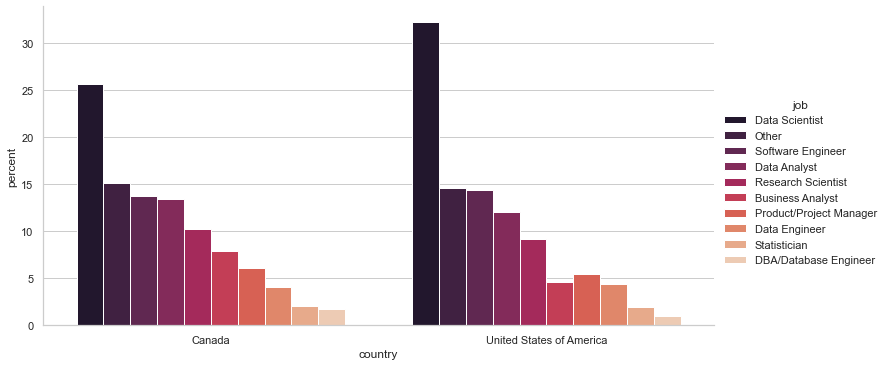

In [208]:
#code inspired by: https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'job'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), 
       x=x,y='percent', 
       hue=y,kind='bar', 
       height=5, aspect=2, 
       palette="rocket"))

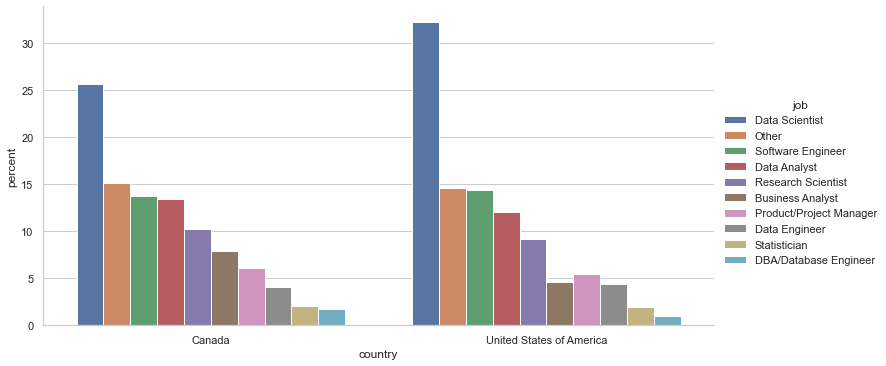

In [209]:
#code inspired by: https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'job'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), 
       x=x,y='percent', 
       hue=y,kind='bar', 
       height=5, aspect=2,))

In [210]:
(dfvis
.groupby('country')['job']
.value_counts(ascending=False, normalize=True)
.mul(100))

country                   job                    
Canada                    Data Scientist             25.655977
                          Other                      15.160350
                          Software Engineer          13.702624
                          Data Analyst               13.411079
                          Research Scientist         10.204082
                          Business Analyst            7.871720
                          Product/Project Manager     6.122449
                          Data Engineer               4.081633
                          Statistician                2.040816
                          DBA/Database Engineer       1.749271
United States of America  Data Scientist             32.314050
                          Other                      14.628099
                          Software Engineer          14.380165
                          Data Analyst               12.024793
                          Research Scientist          9.214876
     

In [211]:
(dfvis
 .groupby('country')['C']
 .value_counts(ascending=False, normalize=True)
 .mul(100))

country                   C
Canada                    0    95.492958
                          1     4.507042
United States of America  0    95.299317
                          1     4.700683
Name: C, dtype: float64

In [212]:
dfvis.columns

Index(['age', 'gender', 'country', 'education', 'job', 'cpny_size',
       'team_size', 'ML_methods', 'salary', 'primary_tool', 'coding_exp',
       'Python', 'R', 'SQL', 'C', 'C++', 'Java', 'JavaScript', 'TypeScript',
       'Bash', 'MATLAB', 'None', 'Other', 'ML_yrs'],
      dtype='object')

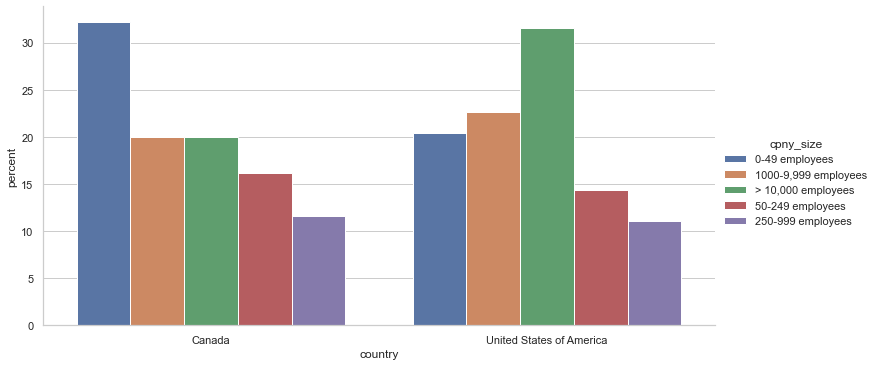

In [213]:
#code inspired by: https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'cpny_size'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), 
       x=x,y='percent', 
       hue=y,kind='bar', 
       height=5, aspect=2,))

In [214]:
dfvis.columns

Index(['age', 'gender', 'country', 'education', 'job', 'cpny_size',
       'team_size', 'ML_methods', 'salary', 'primary_tool', 'coding_exp',
       'Python', 'R', 'SQL', 'C', 'C++', 'Java', 'JavaScript', 'TypeScript',
       'Bash', 'MATLAB', 'None', 'Other', 'ML_yrs'],
      dtype='object')

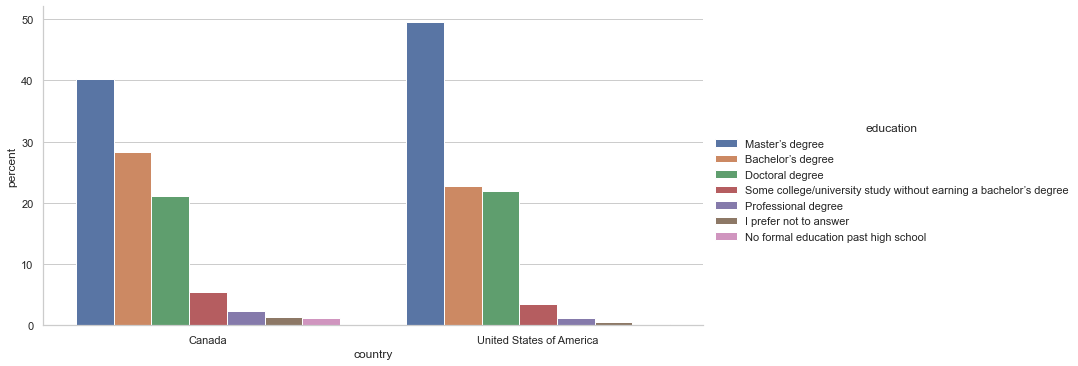

In [215]:
#code inspired by: https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'education'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), 
       x=x,y='percent', 
       hue=y,kind='bar', 
       height=5, aspect=2,))

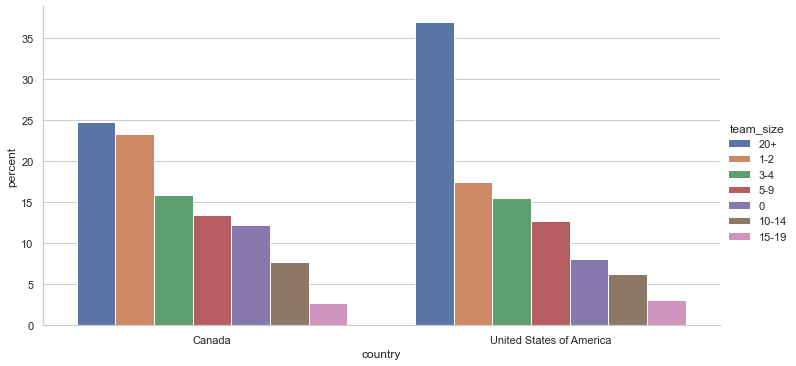

In [216]:
#code inspired by: https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'team_size'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), 
       x=x,y='percent', 
       hue=y,kind='bar', 
       height=5, aspect=2,))

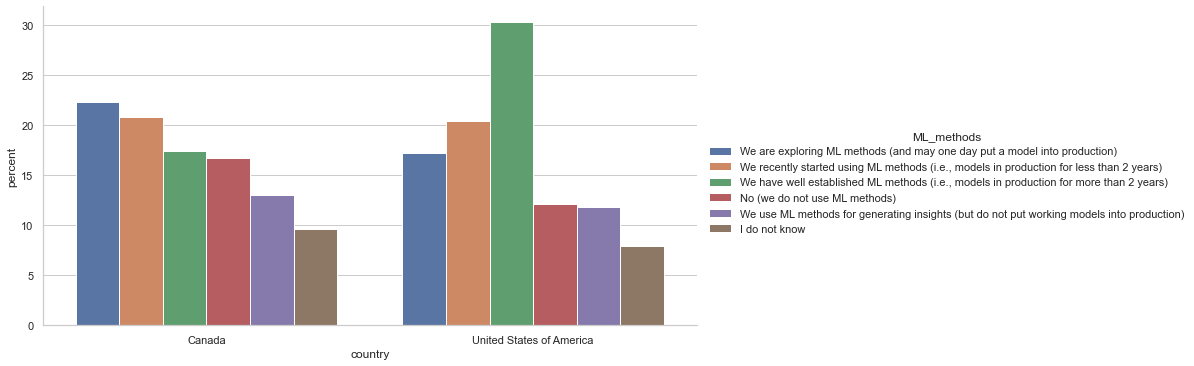

In [217]:
#code inspired by: https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'ML_methods'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), 
       x=x,y='percent', 
       hue=y,kind='bar', 
       height=5, aspect=2,))

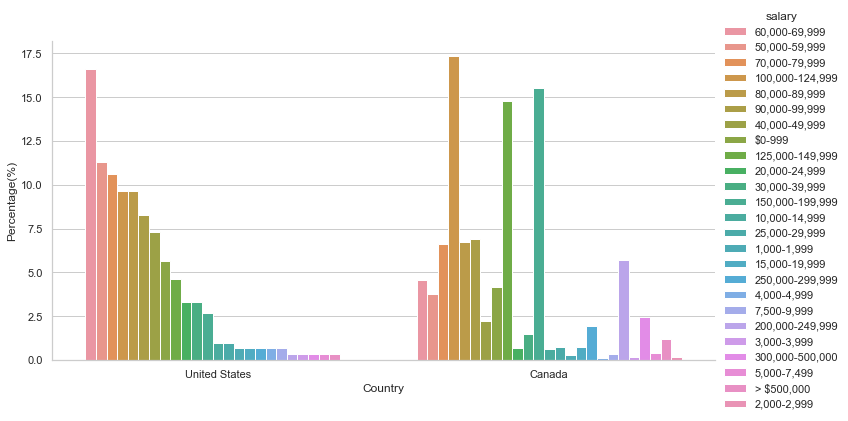

In [218]:
# code inspired by: 
# https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
# https://stackoverflow.com/questions/56605113/how-to-set-x-axis-ticklabels-in-a-seaborn-plot
# as well as generic Seaborn documentation
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'salary'

(dfvis
 .groupby(x)[y]
 .value_counts(ascending=False, normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), 
       x=x,y='percent', 
       hue=y,kind='bar', 
       height=5, aspect=2)
 .set_axis_labels("Country", "Percentage(%)")
 .set_titles("{col_name} {col_var}")
 .set(xticks=[0,1], xticklabels=['United States', 'Canada']))

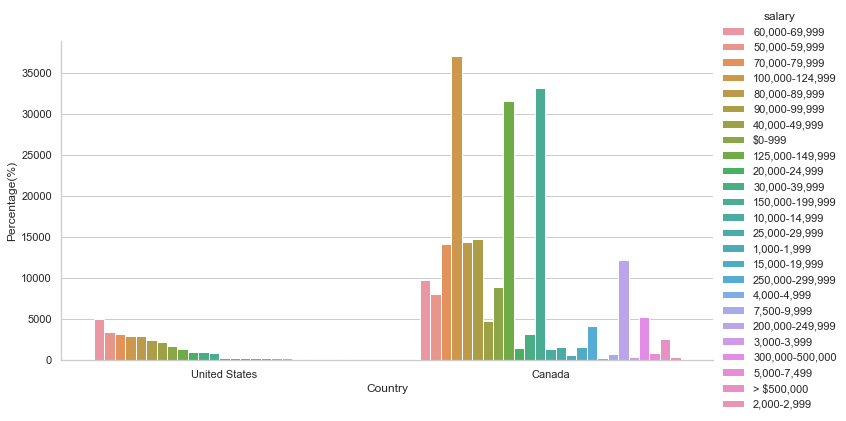

In [219]:
# code inspired by: 
# https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
# https://stackoverflow.com/questions/56605113/how-to-set-x-axis-ticklabels-in-a-seaborn-plot
# as well as generic Seaborn documentation
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'salary'

(dfvis
 .groupby(x)[y]
 .value_counts()
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), 
       x=x,y='percent', 
       hue=y,kind='bar', 
       height=5, aspect=2)
 .set_axis_labels("Country", "Percentage(%)")
 .set_titles("{col_name} {col_var}")
 .set(xticks=[0,1], xticklabels=['United States', 'Canada']))

In [220]:
dfvis['salary'].unique()

array(['80,000-89,999', '90,000-99,999', '125,000-149,999',
       '150,000-199,999', '100,000-124,999', '200,000-249,999', nan,
       '70,000-79,999', '60,000-69,999', '50,000-59,999', '40,000-49,999',
       '10,000-14,999', '> $500,000', '$0-999', '25,000-29,999',
       '300,000-500,000', '7,500-9,999', '20,000-24,999',
       '250,000-299,999', '30,000-39,999', '1,000-1,999', '3,000-3,999',
       '15,000-19,999', '5,000-7,499', '4,000-4,999', '2,000-2,999'],
      dtype=object)

In [221]:
dfvis['salaryOrd']=dfvis['salary']
dfvis['salaryOrd'].unique()

array(['80,000-89,999', '90,000-99,999', '125,000-149,999',
       '150,000-199,999', '100,000-124,999', '200,000-249,999', nan,
       '70,000-79,999', '60,000-69,999', '50,000-59,999', '40,000-49,999',
       '10,000-14,999', '> $500,000', '$0-999', '25,000-29,999',
       '300,000-500,000', '7,500-9,999', '20,000-24,999',
       '250,000-299,999', '30,000-39,999', '1,000-1,999', '3,000-3,999',
       '15,000-19,999', '5,000-7,499', '4,000-4,999', '2,000-2,999'],
      dtype=object)

In [222]:
dfvis['salaryOrd'].replace({'$0-999':0, '1,000-1,999':1, '2,000-2,999':2,
                           '3,000-3,999':3, '4,000-4,999':4, '5,000-7,499':5, 
                           '7,500-9,999':6, '10,000-14,999':7,'15,000-19,999':8,
                           '20,000-24,999':9, '25,000-29,999':10, '30,000-39,999':11,
                           '40,000-49,999':12, '50,000-59,999':13,'60,000-69,999':14,
                           '70,000-79,999':15, '80,000-89,999':16, '90,000-99,999':17,
                           '100,000-124,999':18,'125,000-149,999':19,'150,000-199,999':20,
                           '200,000-249,999':21,'250,000-299,999':22, '300,000-500,000':23,
                           '> $500,000':24}, inplace=True)
dfvis['salaryOrd'].unique()

array([16., 17., 19., 20., 18., 21., nan, 15., 14., 13., 12.,  7., 24.,
        0., 10., 23.,  6.,  9., 22., 11.,  1.,  3.,  8.,  5.,  4.,  2.])

In [223]:
dfvis['salaryOrd'].value_counts()

18.0    399
20.0    340
19.0    330
16.0    173
17.0    173
15.0    173
14.0    148
21.0    123
13.0    115
0.0     106
12.0     70
23.0     53
22.0     44
11.0     42
24.0     27
9.0      25
10.0     19
8.0      18
7.0      17
5.0      10
6.0       9
1.0       8
3.0       5
4.0       4
2.0       4
Name: salaryOrd, dtype: int64

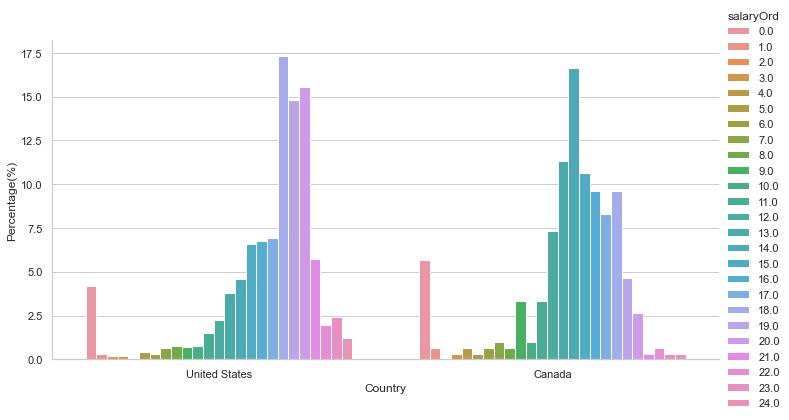

In [311]:
# code inspired by: 
# Pietro Battiston --> https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
# as well as generic Seaborn documentation
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'salaryOrd'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True).sort_index(ascending=False)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), 
       x=x,y='percent', 
       hue=y,kind='bar', 
       height=5, aspect=2, legend_out=True)
 .set_axis_labels("Country", "Percentage(%)")
 .set_titles("{col_name} {col_var}")
 .set(xticks=[0,1], xticklabels=['United States', 'Canada'])
 .savefig("US-Can salary distribution.png"))


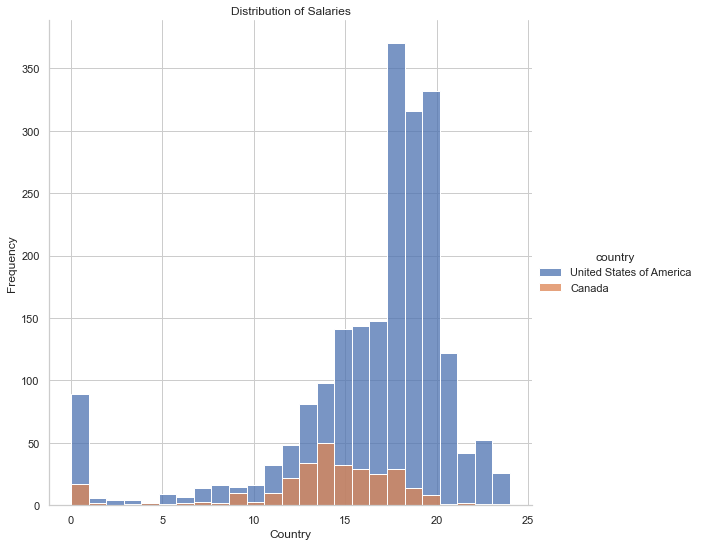

In [238]:
# code inspired by: 
# https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/
# as well as generic Seaborn documentation
import numpy as np
import pandas as pd
import seaborn as sns
g = sns.FacetGrid(dfvis, hue='country', height=7.5)
 
g.map(sns.histplot, 
      'salaryOrd', bins=25,
      kde=False).add_legend()
 
g.set(xlabel='Country',
      ylabel='Frequency',
      title='Distribution of Salaries')

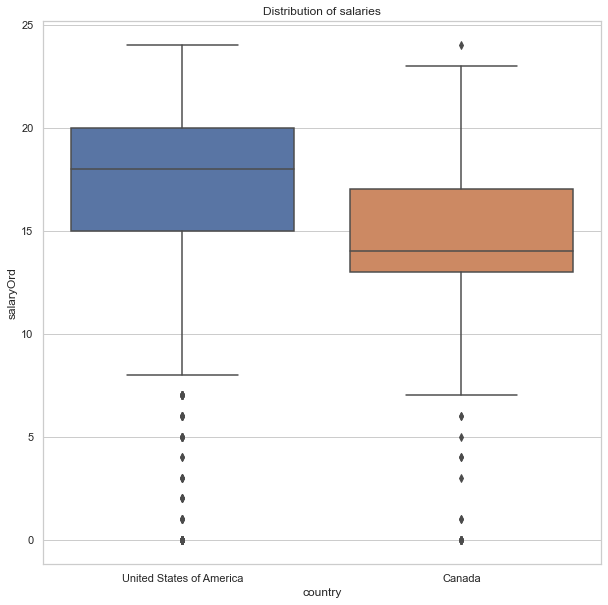

In [270]:
# Here a boxplot with Seaborn. It's good for group comparisons of continuous variables. (I do love seaborn, indeed.
# Inspiration for the code is still: https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
g = sns.boxplot(x='country', y='salaryOrd', data=dfvis, ax=ax)
g.set(title='Distribution of salaries')
g.xaxis.get_ticklabels()
fig = g.get_figure()
fig.savefig("US-Can salary distribution boxplot.png")

In [ ]:
#code inspired by: https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'primary_tool'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), 
       x=x,y='percent', 
       hue=y,kind='bar', 
       height=5, aspect=2,))

In [ ]:
#code inspired by: https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'ML_yrs'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), 
       x=x,y='percent', 
       hue=y,kind='bar', 
       height=5, aspect=2,))

In [ ]:
newdf.head(1)

## Machine Learning Modelling

### Pre-processing: reformatting features and normalizing values for ML models

In [ ]:
dfML=newdf
dfML.shape

In [ ]:
dfML["age"].value_counts()

In [ ]:
dfML["age"].replace({"18-21":0,"22-24":1,"25-29":2,"30-34":3,"35-39":4,"40-44":5,"45-49":6,"50-54":7,"55-59":8,"60-69":9,"70+":10}, inplace=True)

In [ ]:
dfML["age"].value_counts()

In [ ]:
dfML["gender"].replace({"Male":0, "Female":1,"Prefer not to say":2,"Prefer to self-describe":2}, inplace=True)

In [ ]:
dfML[["gender"]].value_counts()

In [ ]:
dfML.head()

In [ ]:
dfML["country"].replace({"United States of America":0, "Canada":1}, inplace=True)
dfML.head()

In [ ]:
# now transform the values of variables Q18 into dummies using get.dummies()


In [ ]:
dfvis.head()

## Model Evaluation <a name="evaluation"></a>

## Discussion and Conclusions <a name="discussion"></a>